# Entropy Calculations of Monoatomic and Diatomic Molecule

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#constants
T = np.linspace(300, 1200, 4)  # in Kelvin
R = 8.314  # J/mol·K
#R = 0.08057
kb = 1.380649*10e-23
pi = 3.141593
Na = 6.02214076e23
h = 6.62607015*10e-34
m = 3.1547583*10e-26
#m = 2.18*10**-25
V = 22.4 # L
ge = 4


#monoatomic

Sm_c = (5*R/2) + (R * np.log((2*pi*m*kb*T/h**2)**(3/2) * (R*T/100000) * (1/Na)))
print(S)

Sm_e = [146.5, 160.9, 169.3, 175.3]

[157.22205969 171.62912383 180.05671611 186.03618798]


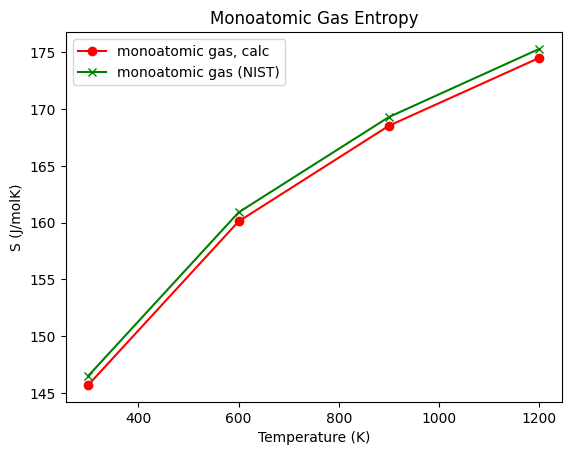

In [ ]:
plt.plot(T, Sm_c, label = 'monoatomic gas, calc', marker='o' ,color='red')
plt.plot(T, Sm_e, label = 'monoatomic gas (NIST)', marker='x' ,color='green')
plt.title('Monoatomic Gas Entropy')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('S (J/molK)')
plt.show()

In [45]:
#constants
T = np.linspace(300, 1200, 4)  # in Kelvin
R = 8.314  # J/mol·K
#R = 0.08057
kb = 1.380649*10e-23
pi = 3.141593
Na = 6.02214076e23
h = 6.62607015*10e-34
m = 3.1547583*10e-26
#m = 2.18*10**-25
V = 22.4 # L
ge = 4

theta_vib = 4227 # K
theta_rot = 15.02 # K
Do = 427.8 * 1000 # J/mol
De = 445.2 * 1000 # J/mol
N = 1
n = 1
P = 1.01325*10e5

Sd_e = [187.1, 192.6, 199.7, 205.9]

#S_tr = (3/2) * kb + kb * np.log((2 * pi * m * kb * T / h**2)**(3/2) * V)
#S_rot = kb*T*(1/T) + kb*np.log(T/theta_rot)
#S_vib = kb * T * ((theta_vib / T**2) * (0.5 + np.exp(-theta_vib / T) / (1 - np.exp(-theta_vib / T)))) + kb * ((-theta_vib / (2 * T)) - np.log(1 - np.exp(-theta_vib / T)))
#S_elec = kb * T * (-N * De / (kb * T**2)) + kb * (N * np.log(ge) + (N * De) / (kb * T))
#S_add = n*R - n*R*np.log(N)

S_tr = (5/2)*n*R + n*R*np.log(((2*pi*m)**(3/2)/h**3) * (kb * T)**(5/2) / P)
S_rot = n*R + n*R*np.log(T/theta_rot)
S_vib = n*R * (theta_vib)/T * (1/(np.exp(theta_vib/T) - 1)) - n*R * np.log(1 - np.exp(-theta_vib/T))
S_elec = n * R * np.log(ge)

Sd_c = S_tr + S_rot + S_vib + S_elec + S_add

print(Sd_c)


[198.63662074 218.86477136 231.04088406 240.11647072]


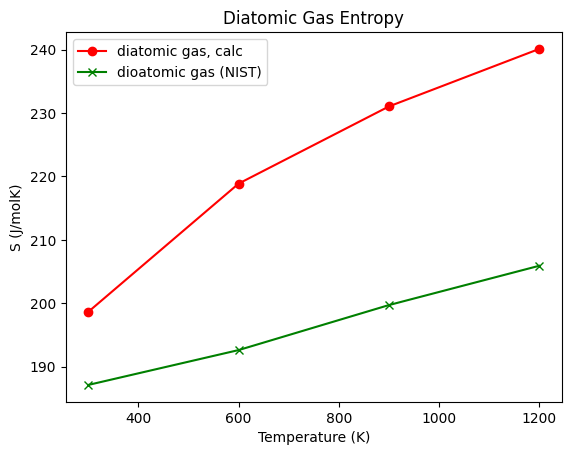

In [49]:
plt.plot(T, Sd_c, label = 'diatomic gas, calc', marker='o' ,color='red')
plt.plot(T, Sd_e, label = 'dioatomic gas (NIST)', marker='x' ,color='green')
plt.title('Diatomic Gas Entropy')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('S (J/molK)')
plt.show()

# Average Internal Energy Actual

In [78]:
import numpy as np
import pandas as pd

# Constants
R = 8.3145  # J/mol·K

# Given parameters
theta_rot = [11.5, 0.624, 0.590]  # rotational temperatures (not used directly in E)
theta_vib = [1900, 1080, 2330]    # vibrational temperatures (K)
T_vals = np.array([303, 500, 1000])  # temperatures in K

# Translational and Rotational energies: (3/2)RT
def translational_energy(T):
    return (3/2) * R * T

def rotational_energy(T):
    return (3/2) * R * T

# Vibrational energy
def vibrational_energy(T, theta_vib):
    return np.sum([R * theta / (np.exp(theta / T) - 1) for theta in theta_vib])

# Compute values
E_trans = np.array([translational_energy(T) for T in T_vals])
E_rot = np.array([rotational_energy(T) for T in T_vals])
E_vib = np.array([vibrational_energy(T, theta_vib) for T in T_vals])
E_total = E_trans + E_rot + E_vib

# Cv,m (numerical derivative of E with respect to T)
Cv_total = np.gradient(E_total, T_vals)
Cv_trans = np.gradient(E_trans, T_vals)
Cv_rot = np.gradient(E_rot, T_vals)
Cv_vib = np.gradient(E_vib, T_vals)

# Output as DataFrame
df = pd.DataFrame({
    "T (K)": T_vals,
    "<E_trans> (J/mol)": E_trans,
    "<E_rot> (J/mol)": E_rot,
    "<E_vib> (J/mol)": E_vib,
    "<E_total> (J/mol)": E_total,
    "Cv_trans (J/mol·K)": Cv_trans,
    "Cv_rot (J/mol·K)": Cv_rot,
    "Cv_vib (J/mol·K)": Cv_vib,
    "Cv_total (J/mol·K)": Cv_total
})

print(df.round(2))

T = [300, 500, 1000]
Cp = [37.03, 43.21, 52.16]
Cv = [(cp - R) for cp in Cp]

   T (K)  <E_trans> (J/mol)  <E_rot> (J/mol)  <E_vib> (J/mol)  \
0    303            3778.94          3778.94           300.47   
1    500            6235.88          6235.88          1717.21   
2   1000           12471.75         12471.75          9483.98   

   <E_total> (J/mol)  Cv_trans (J/mol·K)  Cv_rot (J/mol·K)  Cv_vib (J/mol·K)  \
0            7858.35               12.47             12.47              7.19   
1           14188.96               12.47             12.47              9.55   
2           34427.48               12.47             12.47             15.53   

   Cv_total (J/mol·K)  
0               32.14  
1               34.49  
2               40.48  


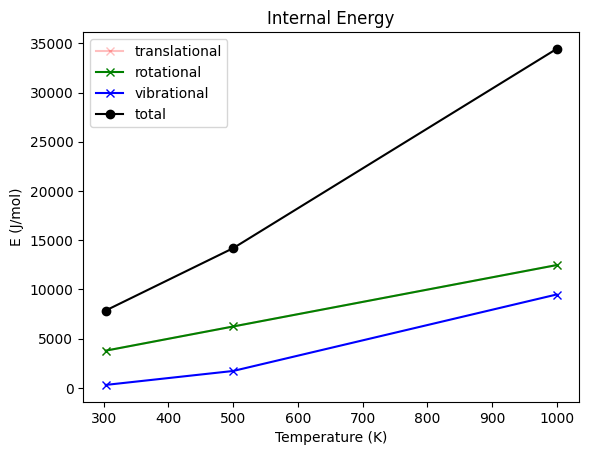

In [79]:
plt.plot(T_vals, E_trans, label = 'translational', marker='x' ,color='red',alpha = 0.25)
plt.plot(T_vals, E_rot, label = 'rotational', marker='x' ,color='green')
plt.plot(T_vals, E_vib, label = 'vibrational', marker='x' ,color='blue')
plt.plot(T_vals, E_total, label = 'total', marker='o' ,color='black')
plt.title('Internal Energy')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('E (J/mol)')
plt.show()

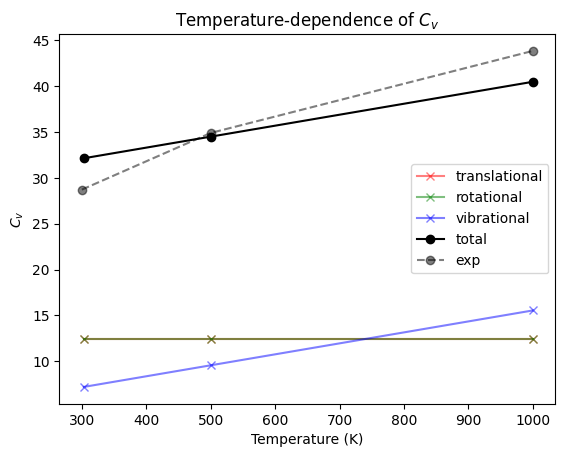

In [80]:
plt.plot(T_vals, Cv_trans, label = 'translational', marker='x' ,color='red',alpha=0.5)
plt.plot(T_vals, Cv_rot, label = 'rotational', marker='x' ,color='green',alpha=0.5)
plt.plot(T_vals, Cv_vib, label = 'vibrational', marker='x' ,color='blue',alpha=0.5)
plt.plot(T_vals, Cv_total, label = 'total', marker='o' ,color='black')
plt.plot(T, Cv, label = 'exp', marker='o' ,color='black',linestyle='--',alpha=0.5)
plt.title('Temperature-dependence of $C_v$')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('$C_v$')
plt.show()

# Average Internal Energy

In [50]:
import numpy as np
import pandas as pd

# Constants
R = 8.3145  # J/mol·K
k = 1.380649e-23  # J/K
h = 6.62607015e-34  # J·s
Na = 6.02214076e23  # 1/mol

# Input values
theta_rot = np.array([11.5, 0.624, 0.590])  # K
theta_vib = np.array([1900, 1080, 2330])  # K
De = 928.0 * 1000  # convert kJ/mol to J/mol
sigma = 2
T_vals = np.array([303, 500, 1000])  # K

# Translational energy (3/2 RT)
E_trans = (3 / 2) * R * T_vals

# Rotational energy for nonlinear molecule (3/2 RT)
E_rot = (3 / 2) * R * T_vals

# Vibrational energy sum over modes: E_vib = sum [ R * theta / (exp(theta/T) - 1) ]
def vibrational_energy(T, theta_vib):
    return np.sum(R * theta_vib / (np.exp(theta_vib / T) - 1))

E_vib = np.array([vibrational_energy(T, theta_vib) for T in T_vals])

# Electronic energy (only ground state considered)
E_elec = np.zeros_like(T_vals)  # De ignored because it's the reference

# Total internal energy
E_total = E_trans + E_rot + E_vib + E_elec

# Cv,m components: d⟨E⟩/dT approximated numerically using central differences
def heat_capacity(E_vals, T_vals):
    dE_dT = np.gradient(E_vals, T_vals)
    return dE_dT

Cv_trans = np.gradient(E_trans, T_vals)
Cv_rot = np.gradient(E_rot, T_vals)
Cv_vib = np.gradient(E_vib, T_vals)
Cv_total = Cv_trans + Cv_rot + Cv_vib  # E_elec is constant, so no Cv_elec

# Compile results into DataFrame
df = pd.DataFrame({
    'T (K)': T_vals,
    '<E_trans> (J/mol)': E_trans,
    '<E_rot> (J/mol)': E_rot,
    '<E_vib> (J/mol)': E_vib,
    '<E_total> (J/mol)': E_total,
    'Cv_trans (J/mol·K)': Cv_trans,
    'Cv_rot (J/mol·K)': Cv_rot,
    'Cv_vib (J/mol·K)': Cv_vib,
    'Cv_total (J/mol·K)': Cv_total
})

df.round(2)


,T (K),<E_trans> (J/mol),<E_rot> (J/mol),<E_vib> (J/mol),<E_total> (J/mol),Cv_trans (J/mol·K),Cv_rot (J/mol·K),Cv_vib (J/mol·K),Cv_total (J/mol·K)
0,303,3778.94,3778.94,300.47,7858.35,12.47,12.47,7.19,32.14
1,500,6235.88,6235.88,1717.21,14188.96,12.47,12.47,9.55,34.49
2,1000,12471.75,12471.75,9483.98,34427.48,12.47,12.47,15.53,40.48


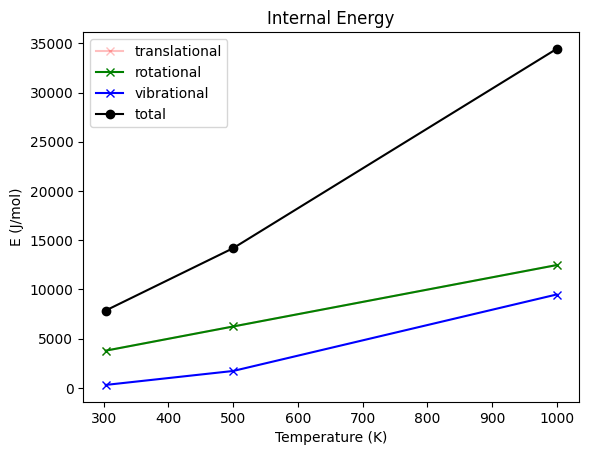

In [71]:
plt.plot(T_vals, E_trans, label = 'translational', marker='x' ,color='red',alpha = 0.25)
plt.plot(T_vals, E_rot, label = 'rotational', marker='x' ,color='green')
plt.plot(T_vals, E_vib, label = 'vibrational', marker='x' ,color='blue')
plt.plot(T_vals, E_total, label = 'total', marker='o' ,color='black')
plt.title('Internal Energy')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('E (J/mol)')
plt.show()

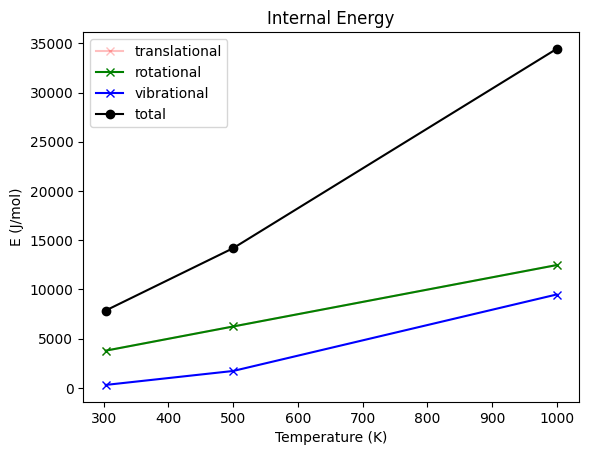

In [59]:
plt.plot(T_vals, E_trans, label = 'translational', marker='x' ,color='red',alpha = 0.25)
plt.plot(T_vals, E_rot, label = 'rotational', marker='x' ,color='green')
plt.plot(T_vals, E_vib, label = 'vibrational', marker='x' ,color='blue')
plt.plot(T_vals, E_total, label = 'total', marker='o' ,color='black')
plt.title('Internal Energy')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('E (J/mol)')
plt.show()

# $C_V$ Heat Capacity

In [70]:
A = 16.10857
B = 75.8985
C = -54.38740
D = 14.30777
E = 0.239423
T = T_vals

Cp = A + B*T + C*T**2  + D*T**3 + E/T**2
Cv = [(cp - R)/10000000 for cp in Cp]
print(Cv)

[np.float64(39.30451151797626), np.float64(177.4912357044071), np.float64(1425.3458506294069)]


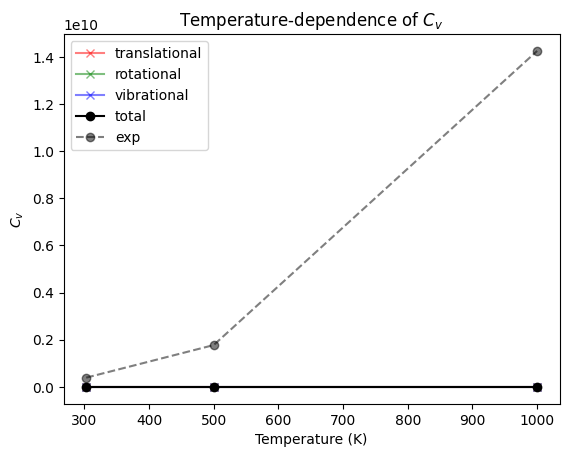

In [65]:
plt.plot(T_vals, Cv_trans, label = 'translational', marker='x' ,color='red',alpha=0.5)
plt.plot(T_vals, Cv_rot, label = 'rotational', marker='x' ,color='green',alpha=0.5)
plt.plot(T_vals, Cv_vib, label = 'vibrational', marker='x' ,color='blue',alpha=0.5)
plt.plot(T_vals, Cv_total, label = 'total', marker='o' ,color='black')
plt.plot(T, Cv, label = 'exp', marker='o' ,color='black',linestyle='--',alpha=0.5)
plt.title('Temperature-dependence of $C_v$')
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('$C_v$')
plt.show()